In [64]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import tensorflow.keras as kb
from tensorflow.keras import backend
import tensorflow as tf
from plotnine import *


In [65]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Music_data.csv")

print(df.shape)
df.head()

(2553, 14)


,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Jonas Brothers,0.594,0.464,0,-7.898,1,0.0340,0.306000,0.000000,0.1870,0.545,193866,Please Be Mine
1,2,Jonas Brothers,0.582,0.697,7,-3.842,1,0.0695,0.000745,0.000000,0.1850,0.701,153346,S.O.S.
2,3,Jonas Brothers,0.442,0.961,1,-2.914,1,0.0928,0.000035,0.000036,0.0619,0.405,168480,Mandy
3,4,Jonas Brothers,0.659,0.857,11,-5.850,1,0.0437,0.004500,0.000002,0.3350,0.798,201960,Year 3000
4,5,Jonas Brothers,0.468,0.893,11,-3.554,1,0.1300,0.003890,0.000000,0.3670,0.810,164973,Hold On


In [75]:
df = df.dropna()

In [76]:
feats = ["danceability", "energy", "loudness","acousticness"]
predict = "valence"

X = df[feats]
y = df[predict]

In [77]:
# Regression

#structure of the model
model = kb.Sequential([
    kb.layers.Dense(4, input_shape =[4]), #input
    kb.layers.Dense(1) #output
])

#how to train the model
model.compile(loss = "mean_squared_error",
              optimizer = kb.optimizers.SGD())

#fit the model (same as SKlearn)
model.fit(X,y, epochs = 100)

Epoch 1/100
2553/2553 [==============================] - 0s 128us/step - loss: 2.6889
Epoch 2/100
2553/2553 [==============================] - 0s 17us/step - loss: 0.0546
Epoch 3/100
2553/2553 [==============================] - 0s 18us/step - loss: 0.0450
Epoch 4/100
2553/2553 [==============================] - 0s 17us/step - loss: 0.0424
Epoch 5/100
2553/2553 [==============================] - 0s 17us/step - loss: 0.0415
Epoch 6/100
2553/2553 [==============================] - 0s 18us/step - loss: 0.0413
Epoch 7/100
2553/2553 [==============================] - 0s 17us/step - loss: 0.0409
Epoch 8/100
2553/2553 [==============================] - 0s 17us/step - loss: 0.0409
Epoch 9/100
2553/2553 [==============================] - 0s 23us/step - loss: 0.0407
Epoch 10/100
2553/2553 [==============================] - 0s 21us/step - loss: 0.0405
Epoch 11/100
2553/2553 [==============================] - 0s 19us/step - loss: 0.0403
Epoch 12/100
2553/2553 [==============================] - 0s 1

2553/2553 [==============================] - 0s 18us/step - loss: 0.0360
Epoch 97/100
2553/2553 [==============================] - 0s 17us/step - loss: 0.0357
Epoch 98/100
2553/2553 [==============================] - 0s 17us/step - loss: 0.0361
Epoch 99/100
2553/2553 [==============================] - 0s 17us/step - loss: 0.0360
Epoch 100/100
2553/2553 [==============================] - 0s 17us/step - loss: 0.0358


In [71]:
Xn = X.to_numpy()
Xn.shape

y_pred = model.predict(Xn).flatten()

true_pred = pd.DataFrame({"true": y, "pred": y_pred})

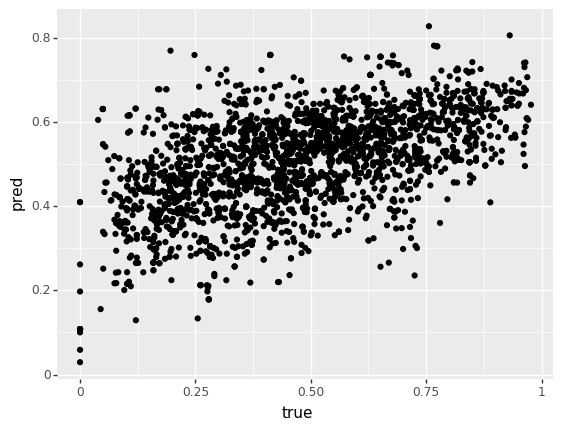

<ggplot: (336426608)>

In [72]:
(ggplot(true_pred, aes(x = "true", y = "pred")) + geom_point())